# Logistic Regression From Scratch

In [48]:
import numpy as np


class Logistic_Regression:

    def __init__(self, learning_rate=0.1, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.X = X
        self.y = y
        # m = number of samples, n = number of features, m = rows, n = columns of matrix X
        self.m, self.n = X.shape

        self.W = np.zeros(self.n)  # initialize weights
        self.b = 0  # initialize bias

        for _ in range(self.iterations):
            self.update_weights()

    def update_weights(self):
        # sigmoid function formula
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))

        tmp = (A - self.y.T)
        tmp = np.reshape(tmp, self.m)
        # derivative of the loss function fro weights
        dW = np.dot(self.X.T, tmp) / self.m
        # derivative of the loss function fro bias
        db = np.sum(tmp) / self.m

        self.W = self.W - self.learning_rate * dW   # update weights
        self.b = self.b - self.learning_rate * db   # update bias

    def predict(self, X):
        # sigmoid function formula
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y_pred = np.where(Z > 0.5, 1, 0)
        return Y_pred

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('datasets/diabetes.csv')

In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [53]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = Logistic_Regression(learning_rate=0.1, iterations=1000)
model.fit(X_train, y_train)

# Evaluate model

In [55]:
#accuracy score on train data
X_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, X_train_pred)
print("Accuracy on train data : ", accuracy_train)

Accuracy on train data :  0.7801302931596091


In [56]:
#accuracy score on test data
X_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, X_test_pred)
print("Accuracy on test data : ", accuracy_test)

Accuracy on test data :  0.7662337662337663


In [57]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_test_pred)
print(cm)

[[96 13]
 [23 22]]


# Making predictive system

In [58]:
input_data = (5,166,72,19,175,25.8,0.587,51)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [59]:
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]


/Users/david/Desktop/ML/study/ml/course/linear_regression/venv/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [60]:
prediction = model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print("The person is not diabetic")
else:
    print("The person is diabetic")

[1]
The person is diabetic


# Evaluate with Logistic Regression from scikit learn

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [62]:
# accuracy score on train data
X_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, X_train_pred)
print("Accuracy on train data : ", accuracy_train)

Accuracy on train data :  0.7801302931596091


In [63]:
# accuracy score on test data
X_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, X_test_pred)
print("Accuracy on test data : ", accuracy_test)

Accuracy on test data :  0.7662337662337663


In [64]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, X_test_pred)
print(cm)

[[96 13]
 [23 22]]


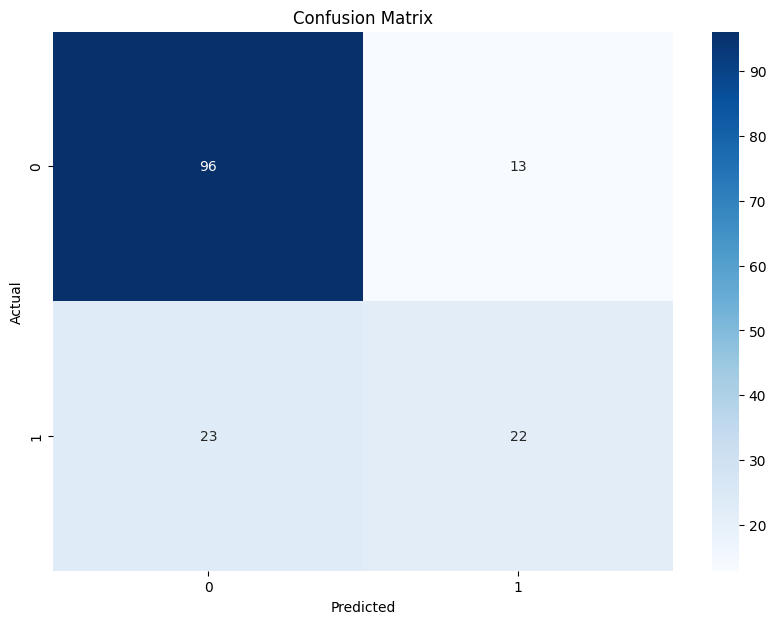

In [65]:
# plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()